In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#for the return pd, the 0 row is the dS value, 1 row is the dN value
ds_dn_df = pd.read_csv("ds_dn.txt", sep = "\t")
ds_dn_df

,0,1,2,3,4,5,6,7,8,9,...,5930,5931,5932,5933,5934,5935,5936,5937,5938,5939
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
1,1,1,6,7,7,7,6,6,7,7,...,18,11,4,2,2,1,1,1,1,1


In [3]:
dN_minus_dS = ds_dn_df.loc[1] - ds_dn_df.loc[0]
dN_minus_dS

0        1
1        1
2        6
3        7
4        7
        ..
5935     1
5936     1
5937     1
5938     1
5939   -48
Length: 5940, dtype: int64

In [28]:
z_score = stats.zscore(dN_minus_dS)
sig_z_score = []
index = 0
for i in z_score:
    if i > 1.96 or i < -1.96:
        sig_z_score.append(index)
    index = index + 1
sig_z_score

[91,
 92,
 93,
 109,
 120,
 121,
 122,
 123,
 124,
 125,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 156,
 171,
 211,
 285,
 289,
 297,
 298,
 300,
 301,
 302,
 303,
 304,
 309,
 356,
 358,
 369,
 385,
 397,
 398,
 438,
 442,
 454,
 474,
 477,
 559,
 560,
 566,
 588,
 596,
 610,
 616,
 620,
 652,
 668,
 699,
 710,
 739,
 743,
 745,
 746,
 748,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 782,
 785,
 789,
 816,
 822,
 825,
 827,
 855,
 869,
 963,
 966,
 995,
 997,
 1003,
 1020,
 1053,
 1060,
 1083,
 1084,
 1087,
 1091,
 1103,
 1114,
 1157,
 1166,
 1178,
 1196,
 1225,
 1251,
 1270,
 1271,
 1291,
 1303,
 1347,
 1368,
 1391,
 1396,
 1403,
 1411,
 1428,
 1430,
 1444,
 1445,
 1451,
 1455,
 1463,
 1464,
 1475,
 1487,
 1493,
 1498,
 1505,
 1522,
 1523,
 1526,
 1531,
 1545,
 1547,
 1558,
 1576,
 1579,
 1589,
 1598,
 1603,
 1604,
 1609,
 1618,
 1623,
 1664,
 1665,
 1677,
 1678,
 1716,
 1722,
 1731,
 1775,
 1786,
 1789,
 1790,
 1797,
 1801,
 1811,
 1830,
 1853,
 1859,
 1947,
 1970,
 1975,
 1978,
 19

In [12]:
dn_over_ds = ds_dn_df.loc[1] / ds_dn_df.loc[0]
dn_over_ds = dn_over_ds.replace([np.inf], np.nan)
dn_ds_log2 = np.log2(dn_over_ds)
dn_ds_log2 = dn_ds_log2[~np.isnan(dn_ds_log2)]
dn_ds_log2

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


135     1.567685
136    -3.152003
137     1.497500
138     1.474602
147     1.497500
          ...   
4962    1.321928
4963   -1.729767
4964   -1.578913
4965   -1.263542
5939   -5.614710
Length: 3422, dtype: float64

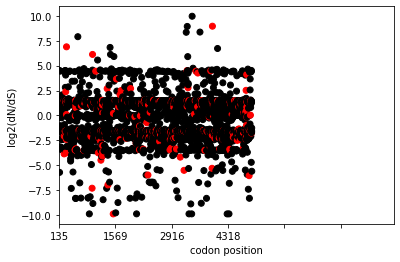

In [29]:
x = dn_ds_log2.index.values
y = dn_ds_log2

colors = []

for index in range(len(dn_ds_log2)):
    if index in sig_z_score:
        colors.append("red")
    else:
        colors.append("black")

fig, ax = plt.subplots()
ax.scatter(x, y, c = colors)
plt.xlim()
plt.xlabel("codon position")
plt.ylabel("log2(dN/dS)")
plt.xticks(np.arange(0, 5940, step = 1000))
plt.xlim([0, 5940])
plt.show()